In [22]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from classification_utils import *
from sklearn import preprocessing
from sklearn import neighbors, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [2]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [3]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619


In [4]:
#a descrption of the dataset
data.describe()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,5148.794751,67.100135,15.045892,0.031045,0.329076,0.088484,0.001967,0.023941,0.084281,0.365536,0.385427,1.357545,14.574041
std,0.499031,18496.606420,12.755296,2.454106,0.053379,0.315589,0.070828,0.007796,0.068508,0.109621,0.408358,0.390777,2.827068,23.390000
min,0.000000,0.000000,32.500000,9.644166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,53.000000,59.686796,13.553296,0.000000,0.010260,0.045455,0.000000,0.000000,0.017751,0.136692,0.119116,0.010526,0.104251
50%,1.000000,57.000000,65.340909,14.694444,0.005109,0.300971,0.070423,0.000000,0.000000,0.045752,0.230747,0.268594,0.043478,0.238606
75%,1.000000,2041.000000,74.254999,16.772205,0.037445,0.450781,0.113295,0.000000,0.000000,0.088862,0.451218,0.491767,0.949402,24.144412
max,1.000000,399555.000000,104.449541,22.000000,0.287760,1.210354,0.337268,0.044444,0.333767,0.529903,2.183383,1.723913,12.902439,198.461303


In [5]:
#check if there is any null value
data.isnull().values.any()

False

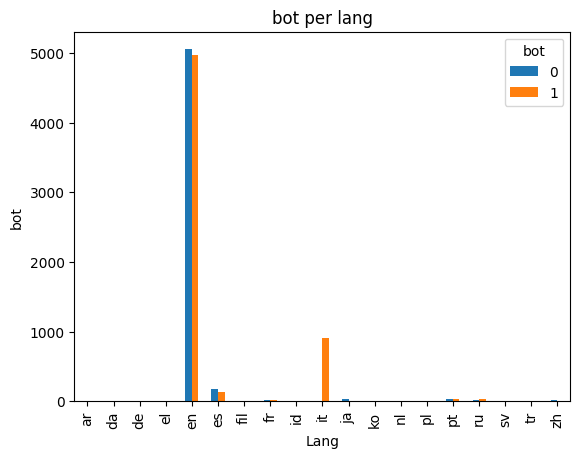

In [6]:
plot_lang_hist(data)

In [7]:
data = data.join(pd.get_dummies(data["lang"]))

In [8]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['created_at', 'statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std', 'ar', 'da', 'de', 'el', 'en', 'es', 'fil', 'fr', 'id', 'it', 'ja', 'ko', 'nl', 'pl', 'pt', 'ru', 'sv', 'tr', 'zh']


In [9]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,...,it,ja,ko,nl,pl,pt,ru,sv,tr,zh
1127105509,1517290515,29,58.000000,12.866667,0.033333,0.166667,0.266667,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2350087202,1550667885,60,64.104000,14.304000,0.000000,0.312000,0.088000,0.0,0.0,0.056000,...,0,0,0,0,0,0,0,0,0,0
2385886057,1552601500,45,65.851852,14.666667,0.000000,0.277778,0.055556,0.0,0.0,0.055556,...,0,0,0,0,0,0,0,0,0,0
131273125,1428782619,98,65.340909,14.694444,0.074766,0.308411,0.028037,0.0,0.0,0.028037,...,0,0,0,0,0,0,0,0,0,0
1128339972,1517325219,53,67.347826,19.434783,0.000000,0.000000,0.130435,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train_set = preprocessing.normalize(train_set)
test_set = preprocessing.normalize(test_set)

In [12]:
k_range = list(range(8, 31))
param_grid = dict(
    n_neighbors = k_range,
    weights = list({'uniform', 'distance'}),
    algorithm = list({'auto', 'ball_tree', 'kd_tree', 'brute'})
)

knn = KNeighborsClassifier()

grid = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 184 candidates, totalling 920 fits
[CV 1/5] END algorithm=brute, n_neighbors=8, weights=distance;, score=0.867 total time=   0.1s
[CV 2/5] END algorithm=brute, n_neighbors=8, weights=distance;, score=0.870 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=8, weights=distance;, score=0.866 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=8, weights=distance;, score=0.873 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=8, weights=distance;, score=0.873 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=8, weights=uniform;, score=0.867 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=8, weights=uniform;, score=0.871 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=8, weights=uniform;, score=0.868 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=8, weights=uniform;, score=0.876 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=8, weights=uniform;, score=0.873 total time=

[CV 2/5] END algorithm=brute, n_neighbors=16, weights=uniform;, score=0.883 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=16, weights=uniform;, score=0.875 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=16, weights=uniform;, score=0.883 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=16, weights=uniform;, score=0.886 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=17, weights=distance;, score=0.877 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=17, weights=distance;, score=0.878 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=17, weights=distance;, score=0.874 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=17, weights=distance;, score=0.886 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=17, weights=distance;, score=0.886 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=17, weights=uniform;, score=0.878 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=17,

[CV 5/5] END algorithm=brute, n_neighbors=25, weights=distance;, score=0.890 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=25, weights=uniform;, score=0.880 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=25, weights=uniform;, score=0.882 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=25, weights=uniform;, score=0.878 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=25, weights=uniform;, score=0.885 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=25, weights=uniform;, score=0.889 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=26, weights=distance;, score=0.876 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=26, weights=distance;, score=0.882 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=26, weights=distance;, score=0.881 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=26, weights=distance;, score=0.884 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=26,

[CV 5/5] END algorithm=ball_tree, n_neighbors=10, weights=uniform;, score=0.878 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=11, weights=distance;, score=0.881 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=11, weights=distance;, score=0.888 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=11, weights=distance;, score=0.880 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=11, weights=distance;, score=0.891 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=11, weights=distance;, score=0.882 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=11, weights=uniform;, score=0.884 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, n_neighbors=11, weights=uniform;, score=0.888 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=11, weights=uniform;, score=0.878 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=11, weights=uniform;, score=0.891 total time=   0.0s
[CV 5

[CV 3/5] END algorithm=ball_tree, n_neighbors=19, weights=distance;, score=0.882 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=19, weights=distance;, score=0.892 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=19, weights=distance;, score=0.889 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=19, weights=uniform;, score=0.882 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, n_neighbors=19, weights=uniform;, score=0.887 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=19, weights=uniform;, score=0.884 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=19, weights=uniform;, score=0.893 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, n_neighbors=19, weights=uniform;, score=0.886 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=20, weights=distance;, score=0.884 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=20, weights=distance;, score=0.887 total time=   0.0s
[CV 3

[CV 2/5] END algorithm=ball_tree, n_neighbors=27, weights=uniform;, score=0.889 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=27, weights=uniform;, score=0.886 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=27, weights=uniform;, score=0.893 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=27, weights=uniform;, score=0.886 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=28, weights=distance;, score=0.888 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=28, weights=distance;, score=0.887 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=28, weights=distance;, score=0.885 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=28, weights=distance;, score=0.895 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=28, weights=distance;, score=0.888 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=28, weights=uniform;, score=0.883 total time=   0.0s
[CV 2

[CV 4/5] END algorithm=kd_tree, n_neighbors=13, weights=distance;, score=0.893 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=13, weights=distance;, score=0.885 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=13, weights=uniform;, score=0.885 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=13, weights=uniform;, score=0.890 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=13, weights=uniform;, score=0.878 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=13, weights=uniform;, score=0.890 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=13, weights=uniform;, score=0.888 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=14, weights=distance;, score=0.884 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=14, weights=distance;, score=0.889 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=14, weights=distance;, score=0.880 total time=   0.0s
[CV 4/5] END algorithm=kd

[CV 5/5] END algorithm=kd_tree, n_neighbors=21, weights=uniform;, score=0.888 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=22, weights=distance;, score=0.885 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=22, weights=distance;, score=0.889 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=22, weights=distance;, score=0.882 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=22, weights=distance;, score=0.893 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=22, weights=distance;, score=0.889 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.885 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.890 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.881 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.892 total time=   0.0s
[CV 5/5] END algorithm=kd

[CV 1/5] END algorithm=kd_tree, n_neighbors=30, weights=uniform;, score=0.882 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=30, weights=uniform;, score=0.888 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=30, weights=uniform;, score=0.885 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=30, weights=uniform;, score=0.894 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=30, weights=uniform;, score=0.886 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=8, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=8, weights=distance;, score=0.870 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=8, weights=distance;, score=0.866 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=8, weights=distance;, score=0.873 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=8, weights=distance;, score=0.873 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=8, w

[CV 4/5] END algorithm=auto, n_neighbors=16, weights=distance;, score=0.883 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=16, weights=distance;, score=0.887 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=16, weights=uniform;, score=0.873 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=16, weights=uniform;, score=0.883 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=16, weights=uniform;, score=0.875 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=16, weights=uniform;, score=0.883 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=16, weights=uniform;, score=0.886 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=17, weights=distance;, score=0.877 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=17, weights=distance;, score=0.878 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=17, weights=distance;, score=0.874 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=17, weights=di

[CV 2/5] END algorithm=auto, n_neighbors=25, weights=distance;, score=0.879 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=25, weights=distance;, score=0.878 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=25, weights=distance;, score=0.884 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=25, weights=distance;, score=0.890 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=25, weights=uniform;, score=0.880 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=25, weights=uniform;, score=0.882 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=25, weights=uniform;, score=0.878 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=25, weights=uniform;, score=0.885 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=25, weights=uniform;, score=0.889 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=26, weights=distance;, score=0.876 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=26, weights=di

In [13]:
knn = grid.best_estimator_

In [14]:
train_pred = knn.predict(train_set)
test_pred = knn.predict(test_set)

In [15]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  1.0
Accuracy test set  0.891398783666377
Precision train set  1.0
Recall train set  1.0
F1 score train set  1.0
Support train set  (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([3774, 4281], dtype=int64))


In [16]:
#compute the performance of the model
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.98      0.78      0.87      1618
         >50       0.84      0.99      0.91      1835

    accuracy                           0.89      3453
   macro avg       0.91      0.88      0.89      3453
weighted avg       0.91      0.89      0.89      3453



In [17]:
# cross validation
scores = cross_validate(knn, train_set, train_label, cv = 3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.019404172897338867
Score time  0.1374826431274414
Test score  0.8888888888888888
Train score  1.0


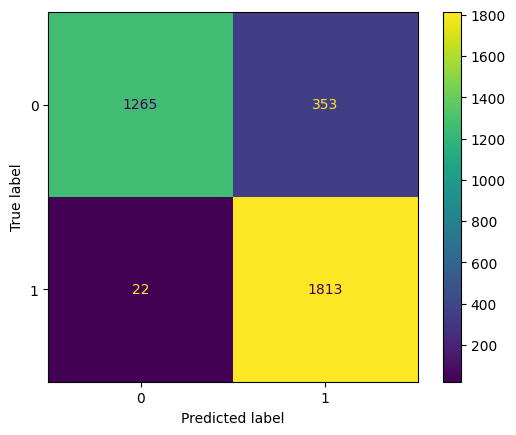

In [18]:
predictions = knn.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set)

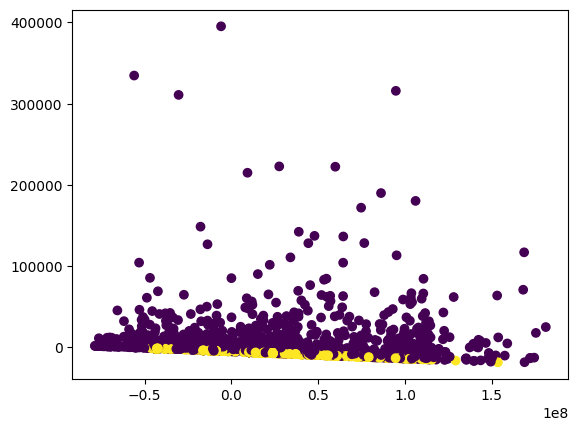

In [19]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label);

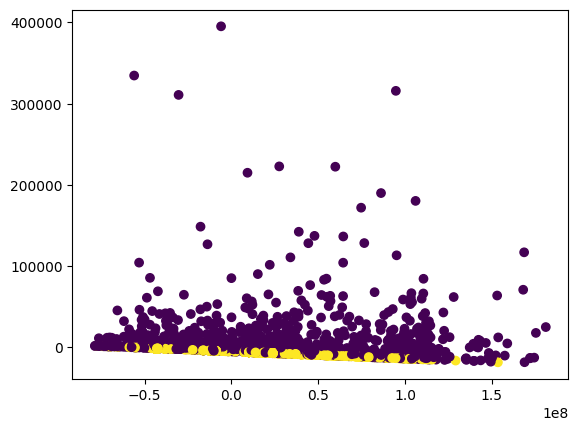

In [20]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred);

In [23]:
with open("models_checkpoints/knn_lang.bin", "wb") as f:
    pickle.dump(knn, f)

### Without lang

In [24]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [25]:
data.drop(columns=['lang'])

,name,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903
2358850842,Lourie Botton,0,2019-02-26 03:02:32,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495
137959629,Dadan Syarifudin,1,2015-04-30 07:09:56,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008
2571493866,MBK Ebook,0,2019-06-18 19:30:21,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911861962,Madrid Lae Maika .,0,2019-11-29 13:16:02,1126,52.677158,12.767086,0.024281,0.775180,0.192446,0.0,0.0,0.053058,0.250664,0.297762,0.043478,58.838683
1378532629,Clau Sato,0,2018-04-27 03:01:58,3024,59.716210,12.984608,0.088504,0.524772,0.114959,0.0,0.0,0.199134,0.506598,0.773291,4.565176,34.533536
126984069,ALMA LETICIA NUÑO,0,2015-03-29 17:01:24,6,67.666667,15.833333,0.005109,0.333333,0.333333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2383025796,Minnie Guadagno,1,2019-03-13 02:44:13,42,63.278846,13.971154,0.000000,0.365385,0.009615,0.0,0.0,0.076923,0.266469,0.391244,0.067308,0.286371


In [26]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['created_at', 'statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std']


In [27]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353619558,1550859864,65,63.297710,13.885496,0.000000,0.312977,0.030534,0.0,0.0,0.045802,0.209054,0.268287,0.022901,0.149587
2382321048,1552405593,40,58.160920,13.402299,0.000000,0.425287,0.091954,0.0,0.0,0.045977,0.209435,0.269055,0.045977,0.258557
143405692,1431688904,54130,83.445975,17.874662,0.072663,0.300971,0.246353,0.0,0.0,0.045752,1.593969,1.616793,9.832793,43.793390
169492360,1437744897,6583,98.176226,21.551953,0.005109,0.902328,0.070423,0.0,0.0,0.054032,0.401046,0.254216,0.043478,61.978014
2360229577,1551227218,48,64.641667,14.825000,0.000000,0.300000,0.025000,0.0,0.0,0.041667,0.199826,0.249882,0.041667,0.199826


In [28]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

In [29]:
train_set = preprocessing.normalize(train_set)
test_set = preprocessing.normalize(test_set)

In [30]:
k_range = list(range(8, 31))
param_grid = dict(
    n_neighbors = k_range,
    weights = list({'uniform', 'distance'}),
    algorithm = list({'auto', 'ball_tree', 'kd_tree', 'brute'})
)

knn = KNeighborsClassifier()

grid = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 184 candidates, totalling 920 fits
[CV 1/5] END algorithm=brute, n_neighbors=8, weights=distance;, score=0.876 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=8, weights=distance;, score=0.866 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=8, weights=distance;, score=0.879 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=8, weights=distance;, score=0.888 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=8, weights=distance;, score=0.866 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=8, weights=uniform;, score=0.876 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=8, weights=uniform;, score=0.866 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=8, weights=uniform;, score=0.879 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=8, weights=uniform;, score=0.888 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=8, weights=uniform;, score=0.867 total time=

[CV 3/5] END algorithm=brute, n_neighbors=16, weights=uniform;, score=0.876 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=16, weights=uniform;, score=0.894 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=16, weights=uniform;, score=0.871 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=17, weights=distance;, score=0.888 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=17, weights=distance;, score=0.869 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=17, weights=distance;, score=0.875 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=17, weights=distance;, score=0.891 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=17, weights=distance;, score=0.869 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=17, weights=uniform;, score=0.888 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=17, weights=uniform;, score=0.869 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=17,

[CV 1/5] END algorithm=brute, n_neighbors=25, weights=uniform;, score=0.891 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=25, weights=uniform;, score=0.872 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=25, weights=uniform;, score=0.875 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=25, weights=uniform;, score=0.891 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=25, weights=uniform;, score=0.873 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=26, weights=distance;, score=0.891 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=26, weights=distance;, score=0.875 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=26, weights=distance;, score=0.877 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=26, weights=distance;, score=0.893 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=26, weights=distance;, score=0.870 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=26,

[CV 4/5] END algorithm=ball_tree, n_neighbors=11, weights=distance;, score=0.894 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=11, weights=distance;, score=0.876 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=11, weights=uniform;, score=0.887 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=11, weights=uniform;, score=0.880 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=11, weights=uniform;, score=0.886 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=11, weights=uniform;, score=0.894 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=11, weights=uniform;, score=0.872 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=12, weights=distance;, score=0.885 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=12, weights=distance;, score=0.876 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=12, weights=distance;, score=0.888 total time=   0.0s
[CV 4

[CV 2/5] END algorithm=ball_tree, n_neighbors=19, weights=uniform;, score=0.884 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=19, weights=uniform;, score=0.883 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=19, weights=uniform;, score=0.898 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, n_neighbors=19, weights=uniform;, score=0.875 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=20, weights=distance;, score=0.891 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=20, weights=distance;, score=0.880 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=20, weights=distance;, score=0.886 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=20, weights=distance;, score=0.895 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=20, weights=distance;, score=0.877 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=20, weights=uniform;, score=0.890 total time=   0.0s
[CV 2

[CV 2/5] END algorithm=ball_tree, n_neighbors=28, weights=distance;, score=0.880 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=28, weights=distance;, score=0.886 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=28, weights=distance;, score=0.898 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=28, weights=distance;, score=0.876 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=28, weights=uniform;, score=0.894 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=28, weights=uniform;, score=0.880 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=28, weights=uniform;, score=0.882 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=28, weights=uniform;, score=0.896 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=28, weights=uniform;, score=0.875 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=29, weights=distance;, score=0.896 total time=   0.0s
[CV 2

[CV 3/5] END algorithm=kd_tree, n_neighbors=13, weights=uniform;, score=0.886 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=13, weights=uniform;, score=0.895 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=13, weights=uniform;, score=0.870 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=14, weights=distance;, score=0.887 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=14, weights=distance;, score=0.877 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=14, weights=distance;, score=0.887 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=14, weights=distance;, score=0.896 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=14, weights=distance;, score=0.873 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=14, weights=uniform;, score=0.883 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=14, weights=uniform;, score=0.877 total time=   0.0s
[CV 3/5] END algorithm=kd

[CV 4/5] END algorithm=kd_tree, n_neighbors=22, weights=distance;, score=0.896 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=22, weights=distance;, score=0.878 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.892 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.880 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.883 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.894 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=22, weights=uniform;, score=0.876 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=23, weights=distance;, score=0.893 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=23, weights=distance;, score=0.879 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=23, weights=distance;, score=0.886 total time=   0.0s
[CV 4/5] END algorithm=kd

[CV 4/5] END algorithm=kd_tree, n_neighbors=30, weights=uniform;, score=0.896 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=30, weights=uniform;, score=0.875 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=8, weights=distance;, score=0.884 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=8, weights=distance;, score=0.872 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=8, weights=distance;, score=0.878 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=8, weights=distance;, score=0.891 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=8, weights=distance;, score=0.875 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=8, weights=uniform;, score=0.877 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=8, weights=uniform;, score=0.865 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=8, weights=uniform;, score=0.876 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=8, weights=unifo

[CV 1/5] END algorithm=auto, n_neighbors=16, weights=uniform;, score=0.888 total time=   0.1s
[CV 2/5] END algorithm=auto, n_neighbors=16, weights=uniform;, score=0.875 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=16, weights=uniform;, score=0.883 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=16, weights=uniform;, score=0.894 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=16, weights=uniform;, score=0.872 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=17, weights=distance;, score=0.894 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=17, weights=distance;, score=0.879 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=17, weights=distance;, score=0.888 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=17, weights=distance;, score=0.897 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=17, weights=distance;, score=0.876 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=17, weights=un

[CV 3/5] END algorithm=auto, n_neighbors=25, weights=distance;, score=0.884 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=25, weights=distance;, score=0.899 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=25, weights=distance;, score=0.878 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=25, weights=uniform;, score=0.894 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=25, weights=uniform;, score=0.881 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=25, weights=uniform;, score=0.884 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=25, weights=uniform;, score=0.896 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=25, weights=uniform;, score=0.876 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=26, weights=distance;, score=0.894 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=26, weights=distance;, score=0.880 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=26, weights=di

In [31]:
knn = grid.best_estimator_

In [32]:
train_pred = knn.predict(train_set)
test_pred = knn.predict(test_set)

In [33]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  1.0
Accuracy test set  0.8960324355632783
Precision train set  1.0
Recall train set  1.0
F1 score train set  1.0
Support train set  (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([3774, 4281], dtype=int64))


In [34]:
#compute the performance of the model
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.99      0.79      0.88      1618
         >50       0.84      0.99      0.91      1835

    accuracy                           0.90      3453
   macro avg       0.91      0.89      0.89      3453
weighted avg       0.91      0.90      0.89      3453



In [35]:
# cross validation
scores = cross_validate(knn, train_set, train_label, cv = 3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.009223699569702148
Score time  0.0952444076538086
Test score  0.8852886405959032
Train score  1.0


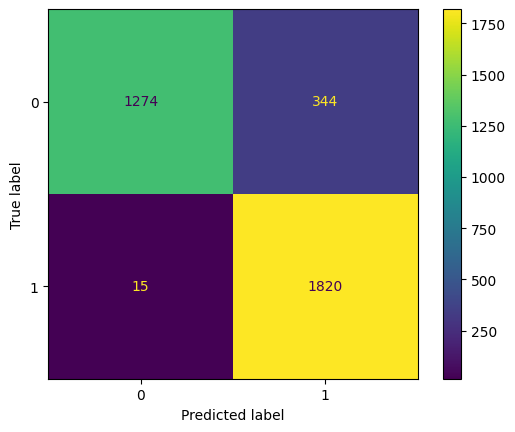

In [36]:
predictions = knn.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

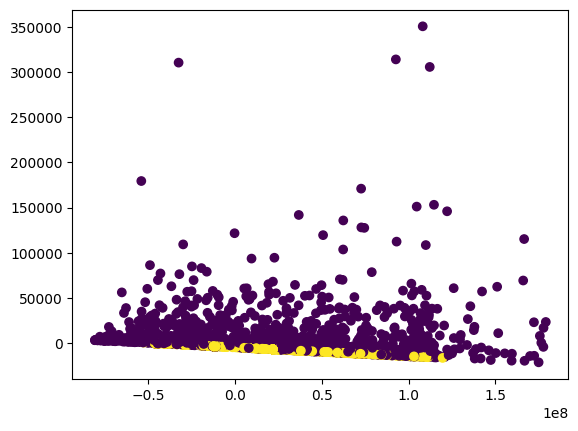

In [37]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label);

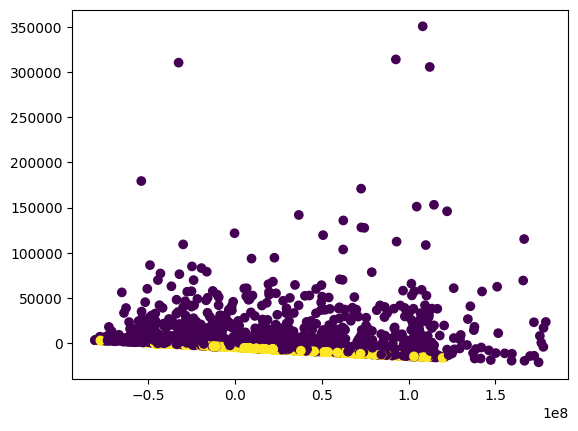

In [38]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred);

In [39]:
with open("models_checkpoints/knn_no_lang.bin", "wb") as f:
    pickle.dump(knn, f)